In [1]:
import datetime
import gudhi
import numpy as np
import pandas as pd

from functions.data_processing import sublevelset_persistence, remove_outliers_z_score, remove_outliers_dbscan
from functions.data_loading import get_condensed_distance_matrix, flights_from_query, get_flight_persistances
from functions.plotting import plot_scatter_matrix

from scipy.cluster.hierarchy import fcluster, linkage
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

from traffic.core import Traffic, Flight

from functions.data_loading import get_data_range
import os
from matplotlib import pyplot as plt

os.chdir('C:\\Users\\tobso\\Desktop\\programering\\masters-thesis')

In [12]:
flights, file_name = get_data_range("new york", "gatwick", datetime.datetime(2020, 1, 1), datetime.datetime(2020, 1, 2), load_results=False)

data = Traffic(flights)[0].data

100%|██████████| 1/1 [00:00<00:00, 76.66it/s]


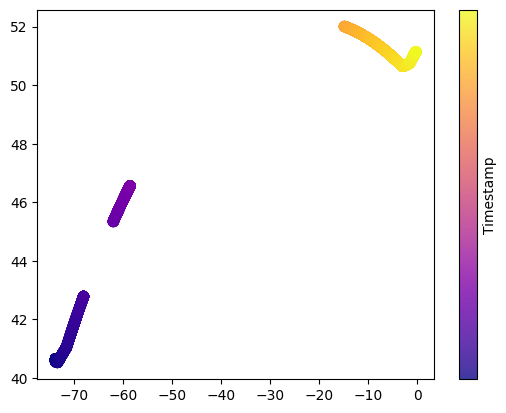

In [14]:
fig, ax = plt.subplots()
timestamp = data['timestamp']

scatter = ax.scatter(data["longitude"], data["latitude"], c=data["timestamp"], cmap='plasma', s=50, alpha=0.8)

cbar = fig.colorbar(scatter, ax=ax)
cbar.set_ticks([])
cbar.set_label('Timestamp')
fig.savefig(f"Thesis Plots\\Methodology\\missing_data.svg", format="svg", dpi=1000, bbox_inches='tight')

In [34]:
landings = flights_from_query(None, "unbalanced_train", load_results=True)[0]

In [46]:
outliers = []
for i, landing in enumerate(landings):
    data = landing.data[["longitude", "latitude"]].dropna(axis="rows")
    length = data.shape[0]
    inliers = remove_outliers_dbscan(data, min_samples=25, eps = 0.05)
    total_outliers = length - sum(inliers)
    if total_outliers > 3:
        outliers.append(i)

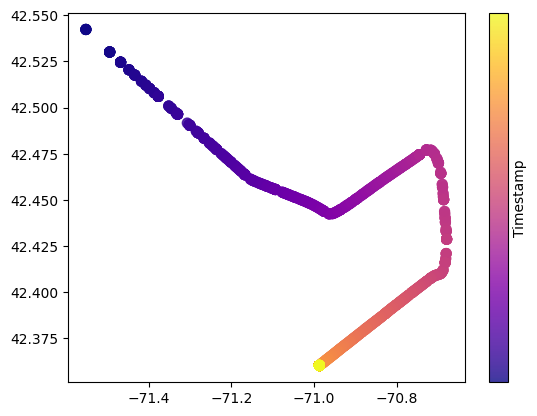

In [196]:
fig, ax = plt.subplots()
data = landings[outliers[10]].data

timestamp = data['timestamp']

scatter = ax.scatter(data["longitude"], data["latitude"], c=data["timestamp"], cmap='plasma', s=50, alpha=0.8)

cbar = fig.colorbar(scatter, ax=ax)
cbar.set_ticks([])
cbar.set_label('Timestamp')
fig.savefig(f"Thesis Plots\\Methodology\\duplicate_data.svg", format="svg", dpi=1000, bbox_inches='tight')

In [198]:
landings[outliers[10]].map_leaflet()

Map(center=[42.41849062551248, -70.96728613900041], controls=(ZoomControl(options=['position', 'zoom_in_text',…

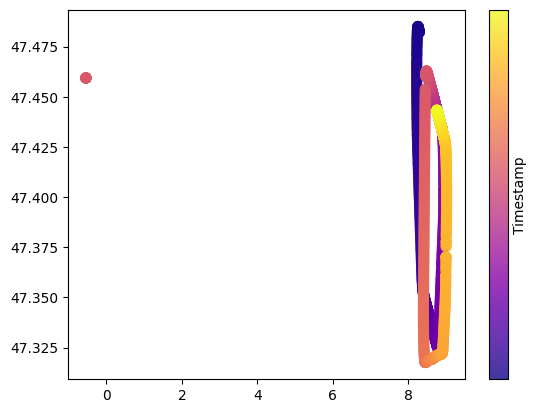

In [199]:
fig, ax = plt.subplots()
data = landings[outliers[21]].data

scatter = ax.scatter(data["longitude"], data["latitude"], c=data["timestamp"], cmap='plasma', s=50, alpha=0.8)

cbar = fig.colorbar(scatter, ax=ax)
cbar.set_ticks([])
cbar.set_label('Timestamp')
fig.savefig(f"Thesis Plots\\Methodology\\outlier_example.svg", format="svg", dpi=1000, bbox_inches='tight')

In [200]:
landings[outliers[21]].map_leaflet()


Map(center=[47.397452534390034, 8.618021549322664], controls=(ZoomControl(options=['position', 'zoom_in_text',…